<h1 align="center">Using your own Photometric Catalog in AutoPHoT</h1> 

In this example we will setup  AutoPhOT to accept a custom / user created catalog of sequence stars for photometric calibration.

The first few cells are setting up the pipeline as shown [here](https://github.com/Astro-Sean/autophot/blob/master/example_notebooks/autophot_example.ipynb)

In [1]:
from autophot.prep_input import load
autophot_input = load()

Default input loaded in from: 
/Users/seanbrennan/miniconda3/envs/autophot/lib/python3.7/site-packages/autophot/databases/default_input.yml


In [2]:
from autophot.example import save_example_data
fpath,my_first_catalog_path = save_example_data.save_fits_to_desktop(return_custom_catalog = True) 

Successful copy of example.fits written to: /Users/seanbrennan/Desktop/autophot_example/example.fits

Returning custom catalog: /Users/seanbrennan/Desktop/autophot_example/my_first_catalog.csv


In [3]:
import os

# Lets just see that everything is in place 
dirpath = os.path.dirname(fpath)

# Location of our fits files
autophot_input['fits_dir'] = dirpath
print('Setting file directory (fits_dir) to: %s' % dirpath)

autophot_input['wdir'] = dirpath
print('Setting work directory (wdir) to: %s' % dirpath)

# set the catalog as before # Can choose skymapper, apass, pan_starrs, 2mass
autophot_input['catalog']['use_catalog'] = 'sdss'

Setting file directory (fits_dir) to: /Users/seanbrennan/Desktop/autophot_example
Setting work directory (wdir) to: /Users/seanbrennan/Desktop/autophot_example



<h2 align="center">Updating AutoPHoT with new catalog</h2> 

In [4]:
# set the use catalog key to 'custom' and enter in the filepath of your custom catalog
autophot_input['catalog']['use_catalog'] = 'custom'

# this is an example sequence stars catlog .... enter the lfile path of your csv file with sequence stars
autophot_input['catalog']['catalog_custom_fpath'] = my_first_catalog_path

<h3 align="center">Formatting your catalog</h3> 

Although the require fields are RA and DEC (case sensitive), there are no restrictions of what filters to include.

* RA and DEC given in degrees in ICRS frame

* Filter name convention follows that used throughout AutoPhOT

 *  Johnson - Cousin: U, B, V, R, I

 *  Sloan : u, g, r, i, z

 * Near-Infrared : J, H, K

Any entryed filters require a corrosponding err e.g [r] and [r_err], although these errors can be set to NaN. If you need a another filter naming convention built into AutoPHoT, please email me to set it up!

In [5]:
import pandas as pd

my_first_catalog = pd.read_csv(my_first_catalog_path)

my_first_catalog.head(10)

,RA,DEC,U,B,V,g,r,i,U_err,B_err,V_err,g_err,r_err,i_err
0,113.769167,-69.468861,17.348,17.086,16.245,16.624,15.974,15.648,0.036,0.021,0.015,0.015,0.020,0.016
1,113.773333,-69.545083,NaN,17.431,16.119,16.753,15.627,15.114,NaN,0.019,0.015,0.015,0.034,0.016
2,113.804167,-69.499333,14.986,14.724,13.894,14.267,13.648,13.374,0.015,0.015,0.015,0.015,0.022,0.015
3,113.807083,-69.451472,16.902,16.672,15.851,16.215,15.615,15.303,0.026,0.019,0.015,0.015,0.028,0.020
4,113.813750,-69.453194,17.793,17.455,16.631,17.006,16.366,16.078,0.051,0.015,0.015,0.015,0.027,0.024
5,113.846250,-69.587750,NaN,17.067,15.755,16.393,15.242,14.747,NaN,0.015,0.015,0.015,0.024,0.015
6,113.866250,-69.518944,16.829,16.515,15.674,16.053,15.454,15.175,0.021,0.015,0.015,0.015,0.031,0.015
7,113.886250,-69.572333,15.082,14.980,14.279,14.597,14.102,13.857,0.015,0.015,0.015,0.015,0.020,0.015
8,113.899583,-69.496500,17.640,16.823,15.639,16.174,15.270,14.850,0.029,0.015,0.015,0.015,0.023,0.017
9,113.907083,-69.464639,16.210,15.976,15.180,15.538,14.970,14.701,0.015,0.015,0.015,0.015,0.021,0.015


<div class="alert alert-warning">
  <strong>Remeber!</strong> Python 3 is case sensitive e.g r != R, u != U
</div>

<h3 align="center">Lets double-check this new catalog</h3> 

To check if the the catalog we've entered is okay, we can plot out the location of the sequence stars

/Users/seanbrennan/miniconda3/envs/autophot/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


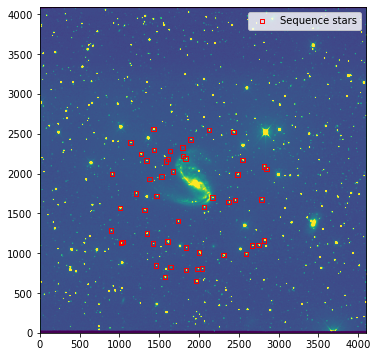

In [6]:
# We will plot out the image 
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize,SquaredStretch,ZScaleInterval


# autophot functions to find image data and header from fits files
from autophot.packages.functions import getimage
from autophot.packages.functions import getheader

# To retrieve the WCS information from this image
from astropy import wcs
from astropy.coordinates import SkyCoord 

# image
data = getimage(fpath)

# header
header = getheader(fpath)

# Create an ImageNormalize object
norm = ImageNormalize(stretch = SquaredStretch())
vmin,vmax = (ZScaleInterval(nsamples = 1000)).get_limits(data)



fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(111)
ax1.imshow(data,
          vmin = vmin,
          vmax = vmax,
          norm = norm,
          origin = 'lower',
          cmap = 'viridis')



w = wcs.WCS(header)


# Plot our sequence stars
ra_stars = my_first_catalog['RA']
dec_stars = my_first_catalog['DEC']

x_pix_stars,y_pix_stars = w.all_world2pix(ra_stars, dec_stars, 0)

ax1.scatter(x_pix_stars,y_pix_stars,
            marker = 's',
            facecolor = 'none',
            edgecolor = 'r',
            s = 20,
            label = 'Sequence stars'
           )



plt.legend(loc= 'best')

plt.show()


Lets check that our catalog is in the correct format and the WCS conversion gives suitable XY pixel corrdinates

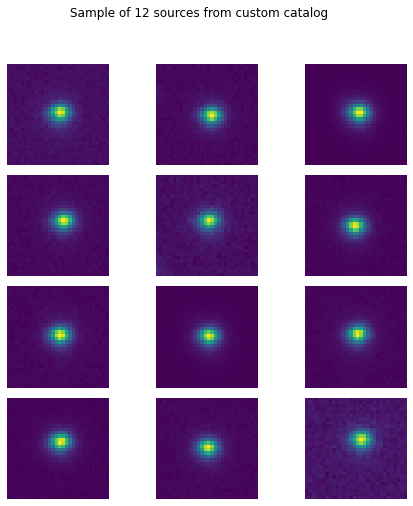

In [7]:
import numpy as np

number_of_sources = 12

ncols = 3
nrows = int(np.ceil(number_of_sources/ncols))
fig, axes = plt.subplots(nrows, ncols,figsize = (8,8),sharex=True, sharey=True, 
                         gridspec_kw={'wspace': 0.0, 'hspace': 0.1})

fig.suptitle('Sample of %d sources from custom catalog' % number_of_sources)


cutout_size = 15


stars_xy = list(zip(x_pix_stars,y_pix_stars))
axes = axes.flatten()
for i in range(number_of_sources):

    
    x,y = stars_xy[i]
    
    star_cutout = data[int(y - cutout_size):int(y + cutout_size),
                       int(x - cutout_size):int(x + cutout_size),]
                      
    
    axes[i].imshow(star_cutout,aspect='equal',origin = 'lower')
    axes[i].axis('off')
    

plt.show()

<div class="alert alert-success">
  <strong>Success!</strong> Looks Good! 
</div>

The catalog sources are succesfully translated to the image pixel coordinates. This is obviously from the sources located in the center of the cutouts above.

You may notice some sources are not perfectly in the center of the cutout, this is fine and the coordinates are updated when AutoPHoT is fitting the sources proir to any photometry

<h2 align="center">Ready to go</h2> 

We have now updated AutoPHoT with the lcoation of our custom catalog. All that is left to do is give the code a target to look at and we're ready to run!

In [8]:
ra = 114.070433
dec = -69.529716

autophot_input['target_ra'] = ra
autophot_input['target_dec'] = dec

# Import automated photometry script and pass input dictionary
from autophot.autophot_main import run_automatic_autophot

run_automatic_autophot(autophot_input)


        _       _       ___ _  _    _____
       /_\ _  _| |_ ___| _ \ || |__|_   _|
      / _ \ || |  _/ _ \  _/ __ / _ \| |
     /_/ \_\_,_|\__\___/_| |_||_\___/|_|
    
     ---------------------------------------
        Automated Photometry of Transients
        S. J. Brennan et al. 2021 
        Please provide feedback/bugs to:
        Email: sean.brennan2@ucdconnect.ie
    ---------------------------------------
Directory of fits file: /Users/seanbrennan/Desktop/autophot_example
Found Telescopes:

 - EXAMPLE_TELESCOPE

-> Telescope check complete

Checking Filter keywords and database

-> Filter check complete

Checking Filter information for each image

Files removed - Wrong Image Type: 0

Files removed - No/Wrong filter(s): 0
Filters not included: []


Files removed: 0

+-----------+
|File: 1 / 1|
+-----------+



File: example_APT.fits - PID: 24198
Start Time: 2022-01-05 13:51:09.449569
Filter keyoward used: FIL_WHL1
Telescope: EXAMPLE_TELESCOPE
Filter: r
MJD: 58849.000
Date of Observation : 2020-01-01
Read Noise: 0.0 [e^- /pixel]
GAIN: 1.0 [e^- /count]
Exposure time: 60 [s] 
Detecting/removing cosmic ray sources


Starting Astroscrappy ... 

Contaminated pixels with Cosmic rays removed: 4048
Cosmic rays removed - image updated
WCS found

Searching for FWHM
Using Gaussian Profile for fitting



+-------------------------------+
|Finding Full Width Half Maximum|
+-------------------------------+




Number of sources before cleaning [ 25.0 sigma ]: 25 
Updating search FWHM value


Updated guess for FWHM: 4.7 pixels 



Number of sources before cleaning [ 25.0 sigma ]: 653 
Too many sources - increasing threshold

Number of sources before cleaning [ 50.0 sigma ]: 414 
Too many sources - increasing threshold

Number of sources before cleaning [ 100.0 sigma ]: 251 
Removed 4 sources near boundary
Removed 5 crowded sources


Fitting source for FWHM: 242/242  

Removed 21 saturated sources
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Removed 22 FWHM outliers
Input data contains invalid values (NaNs or infs), which were automatically clipped.
Removed 61 median outliers
Useable sources found [ 100 sigma ]: 242
Removes 0 sources within minimum seperation [ 23 pixel ]

FWHM: 4.613 +/- 0.153 [ pixels ]

Seeing: 1.797 [ arcsec ]
Aperture size: 7.8 pixels
Aperture correction: -0.062 +/- 0.005 [ mag ]
Catalog found for target_ra_114_dec_-70
Catalog: CUSTOM 
File: /Users/seanbrennan/Desktop/autophot_example/my_first_catalog.csv
Catalog length: 53
Removed 0 sources fainter than cutoff [20 mag]
Using Gaussian Profile for fitting
Catalog Length: 44



+-----------------------------------------------+
|Searching for catalog for target_ra_114_dec_-70|
+-----------------------------------------------+


+---------------------------------+
|Matching catalog sources to image|
+---------------------------------+

Removed 0 sources too close to boundary or off image
Matching catalog to image: 44 / 44 :: Useful sources 44 / 44 


Median offset: 1.6 [ pixels ] / 0.6 [ arcsec ]
Residual table updated: 1 / 10 
	SNR: 554 :: FWHM fitted 4.541


  .. done

Broken cutouts: 0
Not in correct location: 0
Not detected: 0
Saturated: 0
Error: 0


+-------------------------------------------+
|Building PSF model using stars in the field|
+-------------------------------------------+



Residual table updated: 2 / 10 
	SNR: 512 :: FWHM fitted 4.627
Residual table updated: 3 / 10 
	SNR: 509 :: FWHM fitted 4.742
Residual table updated: 4 / 10 
	SNR: 504 :: FWHM fitted 4.698
Residual table updated: 5 / 10 
	SNR: 469 :: FWHM fitted 4.657
Residual table updated: 6 / 10 
	SNR: 467 :: FWHM fitted 4.431
Residual table updated: 7 / 10 
	SNR: 465 :: FWHM fitted 4.692
Residual table updated: 8 / 10 
	SNR: 462 :: FWHM fitted 4.457
Residual table updated: 9 / 10 
	SNR: 461 :: FWHM fitted 4.616
Residual table updated: 10 / 10 
	SNR: 455 :: FWHM fitted 4.451

PSF built using 10 sources

Unity PSF: 26.9 [counts] 
Unity Residual table: 2.7 [counts] 
Using PSF Photometry on Sequence Stars
Approx PSF mag -9.373 mag


PSF model saved as: /Users/seanbrennan/Desktop/autophot_example_REDUCED/example/PSF_model_example_APT.fits

+-------------------+
|Measuring PSF model|
+-------------------+


+-----------------------------------+
|Fitting PSF to sources in the image|
+-----------------------------------+

Fitting PSF to source: 43 / 44 


Mean r-band zeropoint: 23.072 +/- 0.025 



Fitting PSF to source: 44 / 44 
+-----------------------+
|Finding Zeropoint value|
+-----------------------+

Checking for suitable catalog sources
Removed 44 sources lower than SNR of 10.0


Target photometry on original image



+-----------------------------------------------+
|Performing PSF photometry on at target location|
+-----------------------------------------------+



Approximate Target SNR: 55.5
SNR = 55 - skipping limiting magnitude
Pixel Offset: 1.038
Limiting Magnitude: skipped
Target Detection probability: 100 %
Target flux: 175.440 +/- 2.787 [counts/s]
Noise: 70.168 [counts/s]
Target SNR: 55.473 +/- 0.019
Instrumental Magnitude: -5.610 +/- 0.040
Zeropoint: 23.072 +/- 0.025
Target Magnitude: 17.462 +/- 0.064 

*** Transient well detected ***

Time Taken [ 24198 ]: 75s
Sucess: example_APT.fits :: PID 24198 



Error from multlocation [10] recovery: 0.036 [mag]

---

Files that failed : []

DONE

Done - Time Taken: 92.7
